In [1]:
import numpy as np
import pandas as pd

pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib.pyplot as plt
%matplotlib inline
# import warnings
# warnings.filterwarnings('ignore')
import seaborn as sns
from IPython.display import display
from sklearn.ensemble import AdaBoostClassifier

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [2]:
#Reading the respective datasets into data frame

df_train = pd.read_csv("Train_Dataset_(1).csv")
df_test = pd.read_csv("Test_Dataset_(1).csv")

In [3]:
df_train.head()

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,5110001.0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,M,18932.0
1,5110002.0,1.0,32.0,Yes,Sales,5.0,Statistics,Female,62.0,4.0,3.0,Executive,2.0,0.0,8.0,0.0,20.0,4.0,1.0,NaN,Single,18785.0
2,5110003.0,0.0,31.0,Rarely,Analytics,5.0,Statistics,F,45.0,5.0,3.0,Manager,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,Single,22091.0
3,5110004.0,0.0,34.0,Yes,Sales,10.0,Statistics,Female,32.0,3.0,2.0,Manager,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,Divorsed,20302.0
4,5110005.0,0.0,37.0,No,Analytics,27.0,Statistics,Female,49.0,3.0,4.0,Manager,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,Divorsed,21674.0


In [4]:
df_test.head()

,EmployeeID,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,6110001,18.0,No,NaN,9.0,CA,Male,80.0,3,2,Executive,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0
1,6110002,20.0,Rarely,Analytics,28.0,Statistics,Female,59.0,1,3,Executive,1,1,2,1,18.0,2.0,1.0,NaN,Single,18994.0
2,6110003,50.0,Rarely,Analytics,19.0,CA,Female,76.0,3,3,Executive,5,0,5,1,22.0,18.0,3.0,3.0,M,18587.0
3,6110004,32.0,Rarely,Sales,23.0,Statistics,Female,73.0,5,2,Manager,3,0,4,1,17.0,5.0,3.0,3.0,Married,20559.0
4,6110005,39.0,Rarely,Analytics,7.0,CA,Male,42.0,4,1,Senior Manager,5,1,4,0,20.0,9.0,1.0,7.0,Married,24991.0


In [5]:
df_train.columns

Index(['EmployeeID', 'Attrition', 'Age', 'TravelProfile', 'Department', 'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement', 'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus', 'MonthlyIncome'], dtype='object')

In [6]:
df_test.columns

Index(['EmployeeID', 'Age', 'TravelProfile', 'Department', 'HomeToWork', 'EducationField', 'Gender', 'HourlnWeek', 'Involvement', 'WorkLifeBalance', 'Designation', 'JobSatisfaction', 'ESOPs', 'NumCompaniesWorked', 'OverTime', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MaritalStatus', 'MonthlyIncome'], dtype='object')

In [7]:
df_train.shape

(7810, 22)

In [8]:
df_test.shape

(2630, 21)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7810 entries, 0 to 7809
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          5180 non-null   float64
 1   Attrition           5180 non-null   float64
 2   Age                 4864 non-null   float64
 3   TravelProfile       5180 non-null   object 
 4   Department          5056 non-null   object 
 5   HomeToWork          4925 non-null   float64
 6   EducationField      5180 non-null   object 
 7   Gender              5134 non-null   object 
 8   HourlnWeek          4893 non-null   float64
 9   Involvement         5180 non-null   float64
 10  WorkLifeBalance     5180 non-null   float64
 11  Designation         5142 non-null   object 
 12  JobSatisfaction     5180 non-null   float64
 13  ESOPs               5180 non-null   float64
 14  NumCompaniesWorked  5180 non-null   float64
 15  OverTime            5180 non-null   float64
 16  Salary

In [10]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2630 entries, 0 to 2629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   EmployeeID          2630 non-null   int64  
 1   Age                 2488 non-null   float64
 2   TravelProfile       2630 non-null   object 
 3   Department          2572 non-null   object 
 4   HomeToWork          2504 non-null   float64
 5   EducationField      2630 non-null   object 
 6   Gender              2600 non-null   object 
 7   HourlnWeek          2494 non-null   float64
 8   Involvement         2630 non-null   int64  
 9   WorkLifeBalance     2630 non-null   int64  
 10  Designation         2600 non-null   object 
 11  JobSatisfaction     2630 non-null   int64  
 12  ESOPs               2630 non-null   int64  
 13  NumCompaniesWorked  2630 non-null   int64  
 14  OverTime            2630 non-null   int64  
 15  SalaryHikelastYear  2536 non-null   float64
 16  WorkEx

In [11]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
EmployeeID,5180.0,5.112590e+06,1495.481528,5110001.0,5111295.75,5112590.5,5113885.25,5115180.0
Attrition,5180.0,2.789575e-01,0.448530,0.0,0.00,0.0,1.00,1.0
Age,4864.0,3.710855e+01,9.248647,18.0,30.00,36.0,43.00,61.0
HomeToWork,4925.0,1.110741e+01,8.455577,1.0,5.00,9.0,16.00,121.0
HourlnWeek,4893.0,5.797977e+01,12.996674,10.0,49.00,59.0,67.00,99.0
Involvement,5180.0,3.226641e+00,0.872431,1.0,3.00,3.0,4.00,5.0
WorkLifeBalance,5180.0,3.012741e+00,1.410602,1.0,2.00,3.0,4.00,5.0
JobSatisfaction,5180.0,3.144402e+00,1.342776,1.0,2.00,3.0,4.00,5.0
ESOPs,5180.0,4.905405e-01,0.499959,0.0,0.00,0.0,1.00,1.0
NumCompaniesWorked,5180.0,3.157336e+00,2.606036,0.0,1.00,2.0,5.00,21.0


In [12]:
# Checking for duplicates

print(df_train.duplicated().sum())
print(df_test.duplicated().sum())

2629
0


In [13]:
dups = df_train.duplicated()
print("There are {} duplicate Rows present in the Dataset".format(dups.sum()))
df_train[dups]

There are 2629 duplicate Rows present in the Dataset


,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
5181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5182,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5184,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7805,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7806,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7808,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Removing Duplicates**

In [14]:
df_train = df_train.drop_duplicates()
print("There are {} duplicate Rows present in the Dataset: ".format(df_train.duplicated().sum()))

There are 0 duplicate Rows present in the Dataset: 


**Check Missing Values:**

In [15]:
df_train.isnull().sum()

EmployeeID              1
Attrition               1
Age                   317
TravelProfile           1
Department            125
HomeToWork            256
EducationField          1
Gender                 47
HourlnWeek            288
Involvement             1
WorkLifeBalance         1
Designation            39
JobSatisfaction         1
ESOPs                   1
NumCompaniesWorked      1
OverTime                1
SalaryHikelastYear    170
WorkExperience        188
LastPromotion          71
CurrentProfile        312
MaritalStatus           1
MonthlyIncome          94
dtype: int64

In [16]:
df_train[df_train["EmployeeID"].isnull()]

,EmployeeID,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
5180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* We can drop this row as all the fields have NaN value for this Employee ID.


In [17]:
df_train.shape

(5181, 22)

In [18]:
df_train.dropna(how='all',inplace=True)

In [19]:
df_train.shape

(5180, 22)

In [20]:
df_train.isnull().sum()

EmployeeID              0
Attrition               0
Age                   316
TravelProfile           0
Department            124
HomeToWork            255
EducationField          0
Gender                 46
HourlnWeek            287
Involvement             0
WorkLifeBalance         0
Designation            38
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear    169
WorkExperience        187
LastPromotion          70
CurrentProfile        311
MaritalStatus           0
MonthlyIncome          93
dtype: int64

In [21]:
df_test.isnull().sum()

EmployeeID              0
Age                   142
TravelProfile           0
Department             58
HomeToWork            126
EducationField          0
Gender                 30
HourlnWeek            136
Involvement             0
WorkLifeBalance         0
Designation            30
JobSatisfaction         0
ESOPs                   0
NumCompaniesWorked      0
OverTime                0
SalaryHikelastYear     94
WorkExperience        122
LastPromotion          57
CurrentProfile        134
MaritalStatus           0
MonthlyIncome          33
dtype: int64

In [22]:
# Cheking if any column has constant value
print([col for col in df_train if df_train[col].nunique()==1])
print([col for col in df_test if df_test[col].nunique()==1])

[]
[]


In [23]:
# check for unique values
print("Unqiue values per column:")
df_train.nunique()

Unqiue values per column:


EmployeeID            5180
Attrition                2
Age                     44
TravelProfile            3
Department               3
HomeToWork              35
EducationField           6
Gender                   3
HourlnWeek              58
Involvement              5
WorkLifeBalance          5
Designation              5
JobSatisfaction          5
ESOPs                    2
NumCompaniesWorked      14
OverTime                 2
SalaryHikelastYear      16
WorkExperience          42
LastPromotion           17
CurrentProfile          19
MaritalStatus            4
MonthlyIncome         2372
dtype: int64

In [24]:
# check for unique values
print("Unqiue values per column:")
df_test.nunique()

Unqiue values per column:


EmployeeID            2630
Age                     44
TravelProfile            3
Department               3
HomeToWork              35
EducationField           6
Gender                   3
HourlnWeek              61
Involvement              5
WorkLifeBalance          5
Designation              5
JobSatisfaction          5
ESOPs                    2
NumCompaniesWorked      13
OverTime                 2
SalaryHikelastYear      16
WorkExperience          41
LastPromotion           17
CurrentProfile          19
MaritalStatus            4
MonthlyIncome         1707
dtype: int64

In [25]:
df_train['CurrentProfile'].value_counts()

CurrentProfile
3.0     729
2.0     721
0.0     624
1.0     544
8.0     490
7.0     427
4.0     373
9.0     257
5.0     190
10.0    146
6.0      97
11.0     82
12.0     63
13.0     49
14.0     33
15.0     14
17.0     12
16.0     11
18.0      7
Name: count, dtype: int64

**Geting unique counts of all object datatype: Train Data set**

In [26]:
# Geting unique counts of all object datatype:

for feature in df_train.columns:
    if df_train[feature].dtype=='object':
        print(feature,"---->")
        print(df_train[feature].value_counts())
        print("\n")

TravelProfile ---->
TravelProfile
Rarely    3637
Yes       1051
No         492
Name: count, dtype: int64


Department ---->
Department
Analytics    3219
Sales        1615
Marketing     222
Name: count, dtype: int64


EducationField ---->
EducationField
Statistics           2129
CA                   1560
Marketing Diploma     603
Engineer              487
Other                 284
MBA                   117
Name: count, dtype: int64


Gender ---->
Gender
Male      3094
Female    1338
F          702
Name: count, dtype: int64


Designation ---->
Designation
Executive         2072
Manager           1756
Senior Manager     763
AVP                328
VP                 223
Name: count, dtype: int64


MaritalStatus ---->
MaritalStatus
Single      1776
Married     1614
Divorsed    1016
M            774
Name: count, dtype: int64




* Gender column has 3 values Male,Female amd F so here we need to Replace the F with Female.
* MaritalStatus column has 4 unique values ,here M has to be Replaced with Married.

**Replacing F with Female and M with Married in Respective Columns:**

In [27]:
df_train['Gender'].replace('F','Female',inplace=True)
df_train['MaritalStatus'].replace('M','Married',inplace=True)

In [28]:
df_train['Gender'].value_counts()

Gender
Male      3094
Female    2040
Name: count, dtype: int64

In [29]:
df_train['MaritalStatus'].value_counts()

MaritalStatus
Married     2388
Single      1776
Divorsed    1016
Name: count, dtype: int64

**Geting unique counts of all object datatype: Test Data set**

In [30]:
for feature in df_test.columns:
    if df_test[feature].dtype=='object':
        print(feature,"------>")
        print(df_test[feature].value_counts())
        print("\n")

TravelProfile ------>
TravelProfile
Rarely    1852
Yes        529
No         249
Name: count, dtype: int64


Department ------>
Department
Analytics    1675
Sales         792
Marketing     105
Name: count, dtype: int64


EducationField ------>
EducationField
Statistics           1040
CA                    857
Marketing Diploma     291
Engineer              263
Other                 145
MBA                    34
Name: count, dtype: int64


Gender ------>
Gender
Male      1574
Female     682
F          344
Name: count, dtype: int64


Designation ------>
Designation
Executive         993
Manager           920
Senior Manager    391
AVP               179
VP                117
Name: count, dtype: int64


MaritalStatus ------>
MaritalStatus
Single      933
Married     841
Divorsed    477
M           379
Name: count, dtype: int64




* Gender column has 3 values Male,Female amd F so here we need to Replace the F with Female.
* MaritalStatus column has 4 unique values ,here M has to be Replaced with Married.

**Replacing F with Female and M with Married in Respective Columns:**

In [31]:
df_test['Gender'].replace('F','Female',inplace=True)
df_test['MaritalStatus'].replace('M','Married',inplace=True)

In [32]:
df_test['Gender'].value_counts()

Gender
Male      1574
Female    1026
Name: count, dtype: int64

In [33]:
df_test['MaritalStatus'].value_counts()

MaritalStatus
Married     1220
Single       933
Divorsed     477
Name: count, dtype: int64

**Dropping Employee Id column**


In [34]:
df_train.drop('EmployeeID',axis=1,inplace=True)
df_test.drop('EmployeeID',axis=1,inplace=True)

In [35]:
df_train.head(1)

,Attrition,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,0.0,35.0,Rarely,Analytics,5.0,CA,Male,69.0,1.0,1.0,Executive,1.0,1.0,1.0,1.0,20.0,7.0,2.0,NaN,Married,18932.0


In [36]:
df_test.head(1)

,Age,TravelProfile,Department,HomeToWork,EducationField,Gender,HourlnWeek,Involvement,WorkLifeBalance,Designation,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome
0,18.0,No,NaN,9.0,CA,Male,80.0,3,2,Executive,3,1,1,0,17.0,0.0,0.0,0.0,Single,16904.0


In [37]:
mis_val = df_train.isnull().sum()
        
        # Percentage of missing values by column
mis_val_percent = 100 * df_train.isnull().sum() / len(df_train)
        
        # build a table with the columns
mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
mis_val_table

,0,1
Attrition,0,0.000000
Age,316,6.100386
TravelProfile,0,0.000000
Department,124,2.393822
HomeToWork,255,4.922780
EducationField,0,0.000000
Gender,46,0.888031
HourlnWeek,287,5.540541
Involvement,0,0.000000
WorkLifeBalance,0,0.000000


In [38]:
def missing_values_table(df):
        # Total missing values by column
        mis_val = df.isnull().sum()
        
        # Percentage of missing values by column
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # build a table with the columns
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns


In [39]:
print("Train set columns with null values: ")
print(list(df_train.columns[df_train.isnull().any()]))
print('===========================================')
# Missing values for training data
missing_values_train = missing_values_table(df_train)
missing_values_train[:20].style.background_gradient(cmap='Blues')

Train set columns with null values: 
['Age', 'Department', 'HomeToWork', 'Gender', 'HourlnWeek', 'Designation', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome']
Your selected dataframe has 21 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
Age,316,6.100000
CurrentProfile,311,6.000000
HourlnWeek,287,5.500000
HomeToWork,255,4.900000
WorkExperience,187,3.600000
SalaryHikelastYear,169,3.300000
Department,124,2.400000
MonthlyIncome,93,1.800000
LastPromotion,70,1.400000
Gender,46,0.900000


In [40]:
print("Test set columns with null values: ")
print(list(df_test.columns[df_test.isnull().any()]))
print('===========================================')
# Missing values for test data
missing_values_test = missing_values_table(df_test)
missing_values_test[:20].style.background_gradient(cmap='Blues')

Test set columns with null values: 
['Age', 'Department', 'HomeToWork', 'Gender', 'HourlnWeek', 'Designation', 'SalaryHikelastYear', 'WorkExperience', 'LastPromotion', 'CurrentProfile', 'MonthlyIncome']
Your selected dataframe has 20 columns.
There are 11 columns that have missing values.


,Missing Values,% of Total Values
Age,142,5.400000
HourlnWeek,136,5.200000
CurrentProfile,134,5.100000
HomeToWork,126,4.800000
WorkExperience,122,4.600000
SalaryHikelastYear,94,3.600000
Department,58,2.200000
LastPromotion,57,2.200000
MonthlyIncome,33,1.300000
Gender,30,1.100000


## Imputation of null values

In [41]:
df_train.dtypes

Attrition             float64
Age                   float64
TravelProfile          object
Department             object
HomeToWork            float64
EducationField         object
Gender                 object
HourlnWeek            float64
Involvement           float64
WorkLifeBalance       float64
Designation            object
JobSatisfaction       float64
ESOPs                 float64
NumCompaniesWorked    float64
OverTime              float64
SalaryHikelastYear    float64
WorkExperience        float64
LastPromotion         float64
CurrentProfile        float64
MaritalStatus          object
MonthlyIncome         float64
dtype: object

In [42]:
#Columns which needs to be imputed by their modal values
cat_column = ['Department','Gender','Designation']

In [43]:
for col in cat_column:
    df_train[col] = df_train[col].fillna(df_train[col].mode()[0])
    df_test[col] = df_test[col].fillna(df_test[col].mode()[0])

In [44]:
df_train[['Department','Gender','Designation']].isnull().sum()

Department     0
Gender         0
Designation    0
dtype: int64

In [45]:
num_col = ['Age','HourlnWeek','CurrentProfile','HomeToWork','WorkExperience','SalaryHikelastYear',
           'LastPromotion','MonthlyIncome']

In [46]:
for col in num_col:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_test[col].median())

In [47]:
df_train.isnull().sum()

Attrition             0
Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [48]:
df_test.isnull().sum()

Age                   0
TravelProfile         0
Department            0
HomeToWork            0
EducationField        0
Gender                0
HourlnWeek            0
Involvement           0
WorkLifeBalance       0
Designation           0
JobSatisfaction       0
ESOPs                 0
NumCompaniesWorked    0
OverTime              0
SalaryHikelastYear    0
WorkExperience        0
LastPromotion         0
CurrentProfile        0
MaritalStatus         0
MonthlyIncome         0
dtype: int64

In [49]:
len(df_train.describe().columns)

15

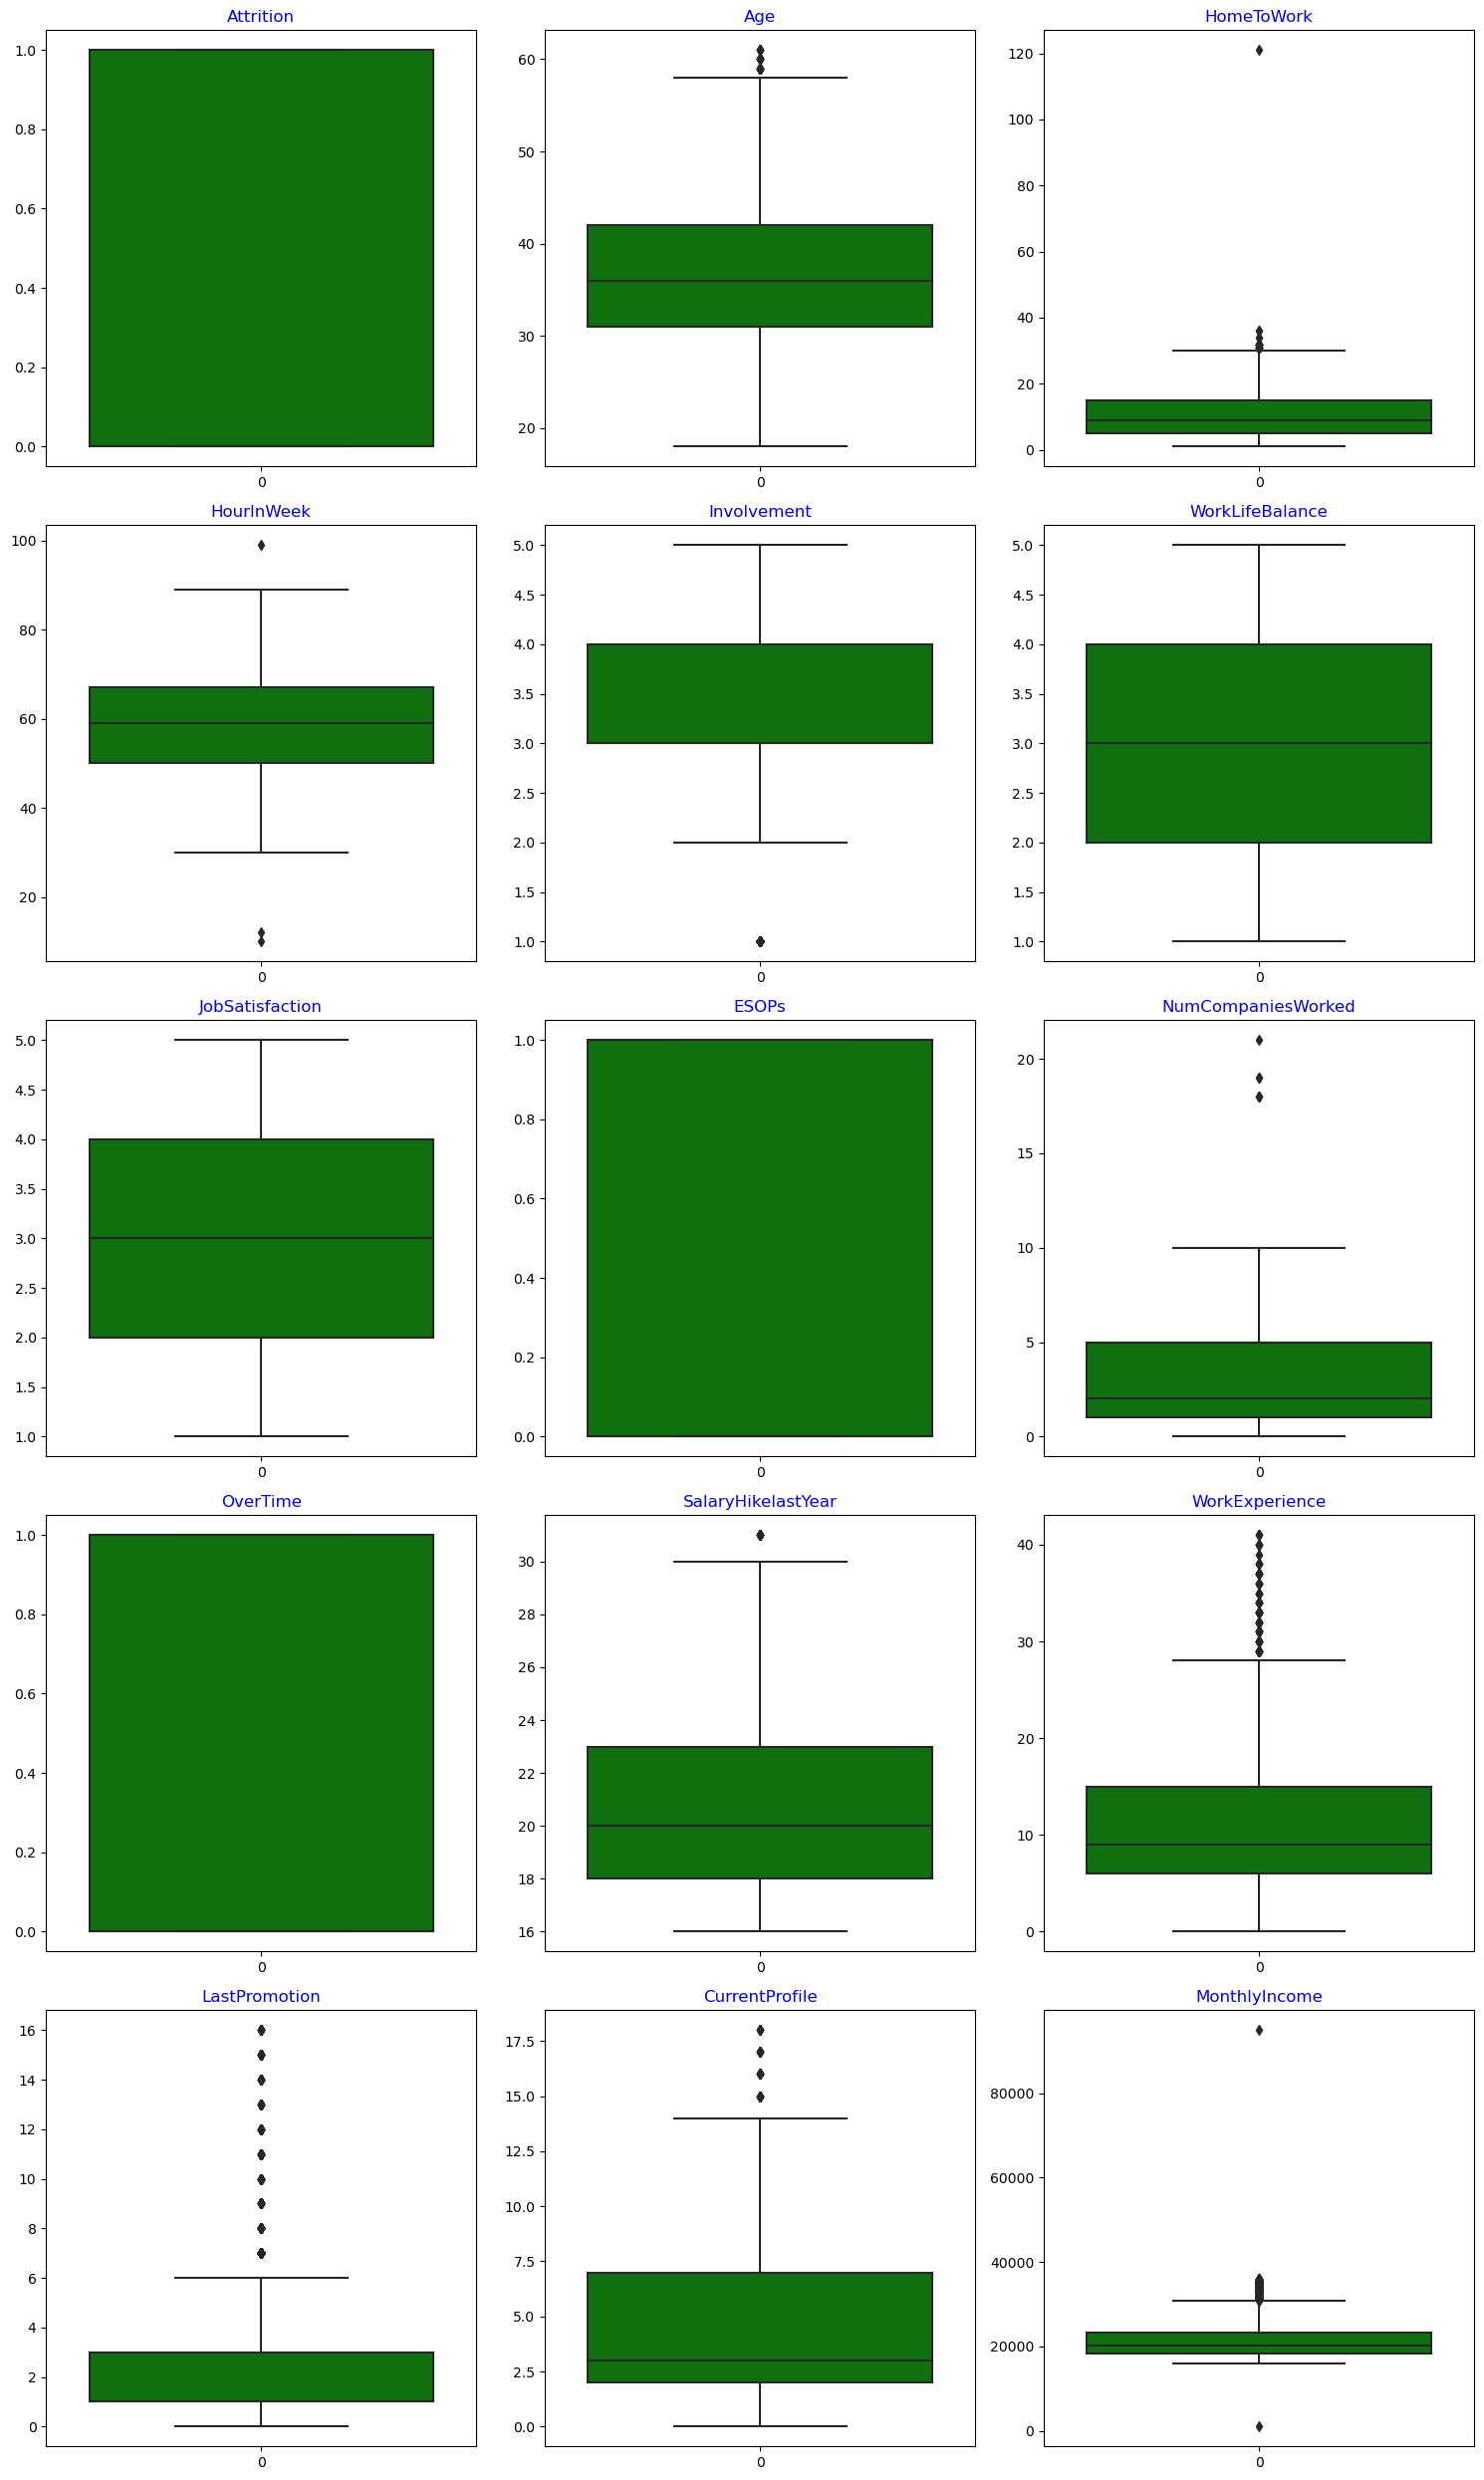

In [50]:
#Plotting Boxplots for Outlier visual

fig=plt.figure(figsize=(15,25))
for i in range(0,len(df_train.describe().columns)):
   ax=fig.add_subplot(5,3,i+1)
   sns.boxplot(df_train[df_train.describe().columns[i]],color='green')
   ax.set_title(df_train.describe().columns[i],color='blue')
plt.tight_layout()
plt.show()

In [51]:
# Define a function which returns the Upper and Lower limit to detect outliers for each feature.
def remove_outlier(col):
    Q1,Q3 = col.quantile([0.25,0.75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [52]:
# Cap & floor the values beyond the outlier boundaries
col = ['Age','HomeToWork','HourlnWeek','Involvement','NumCompaniesWorked','SalaryHikelastYear',
        'WorkExperience','LastPromotion','CurrentProfile','MonthlyIncome']
#feature_list=ad_num.columns
for i in col:
    LL,UL = remove_outlier(df_train[i])
    df_train[i] = np.where(df_train[i] > UL,UL,df_train[i])
    df_train[i] = np.where(df_train[i] < LL,LL,df_train[i])

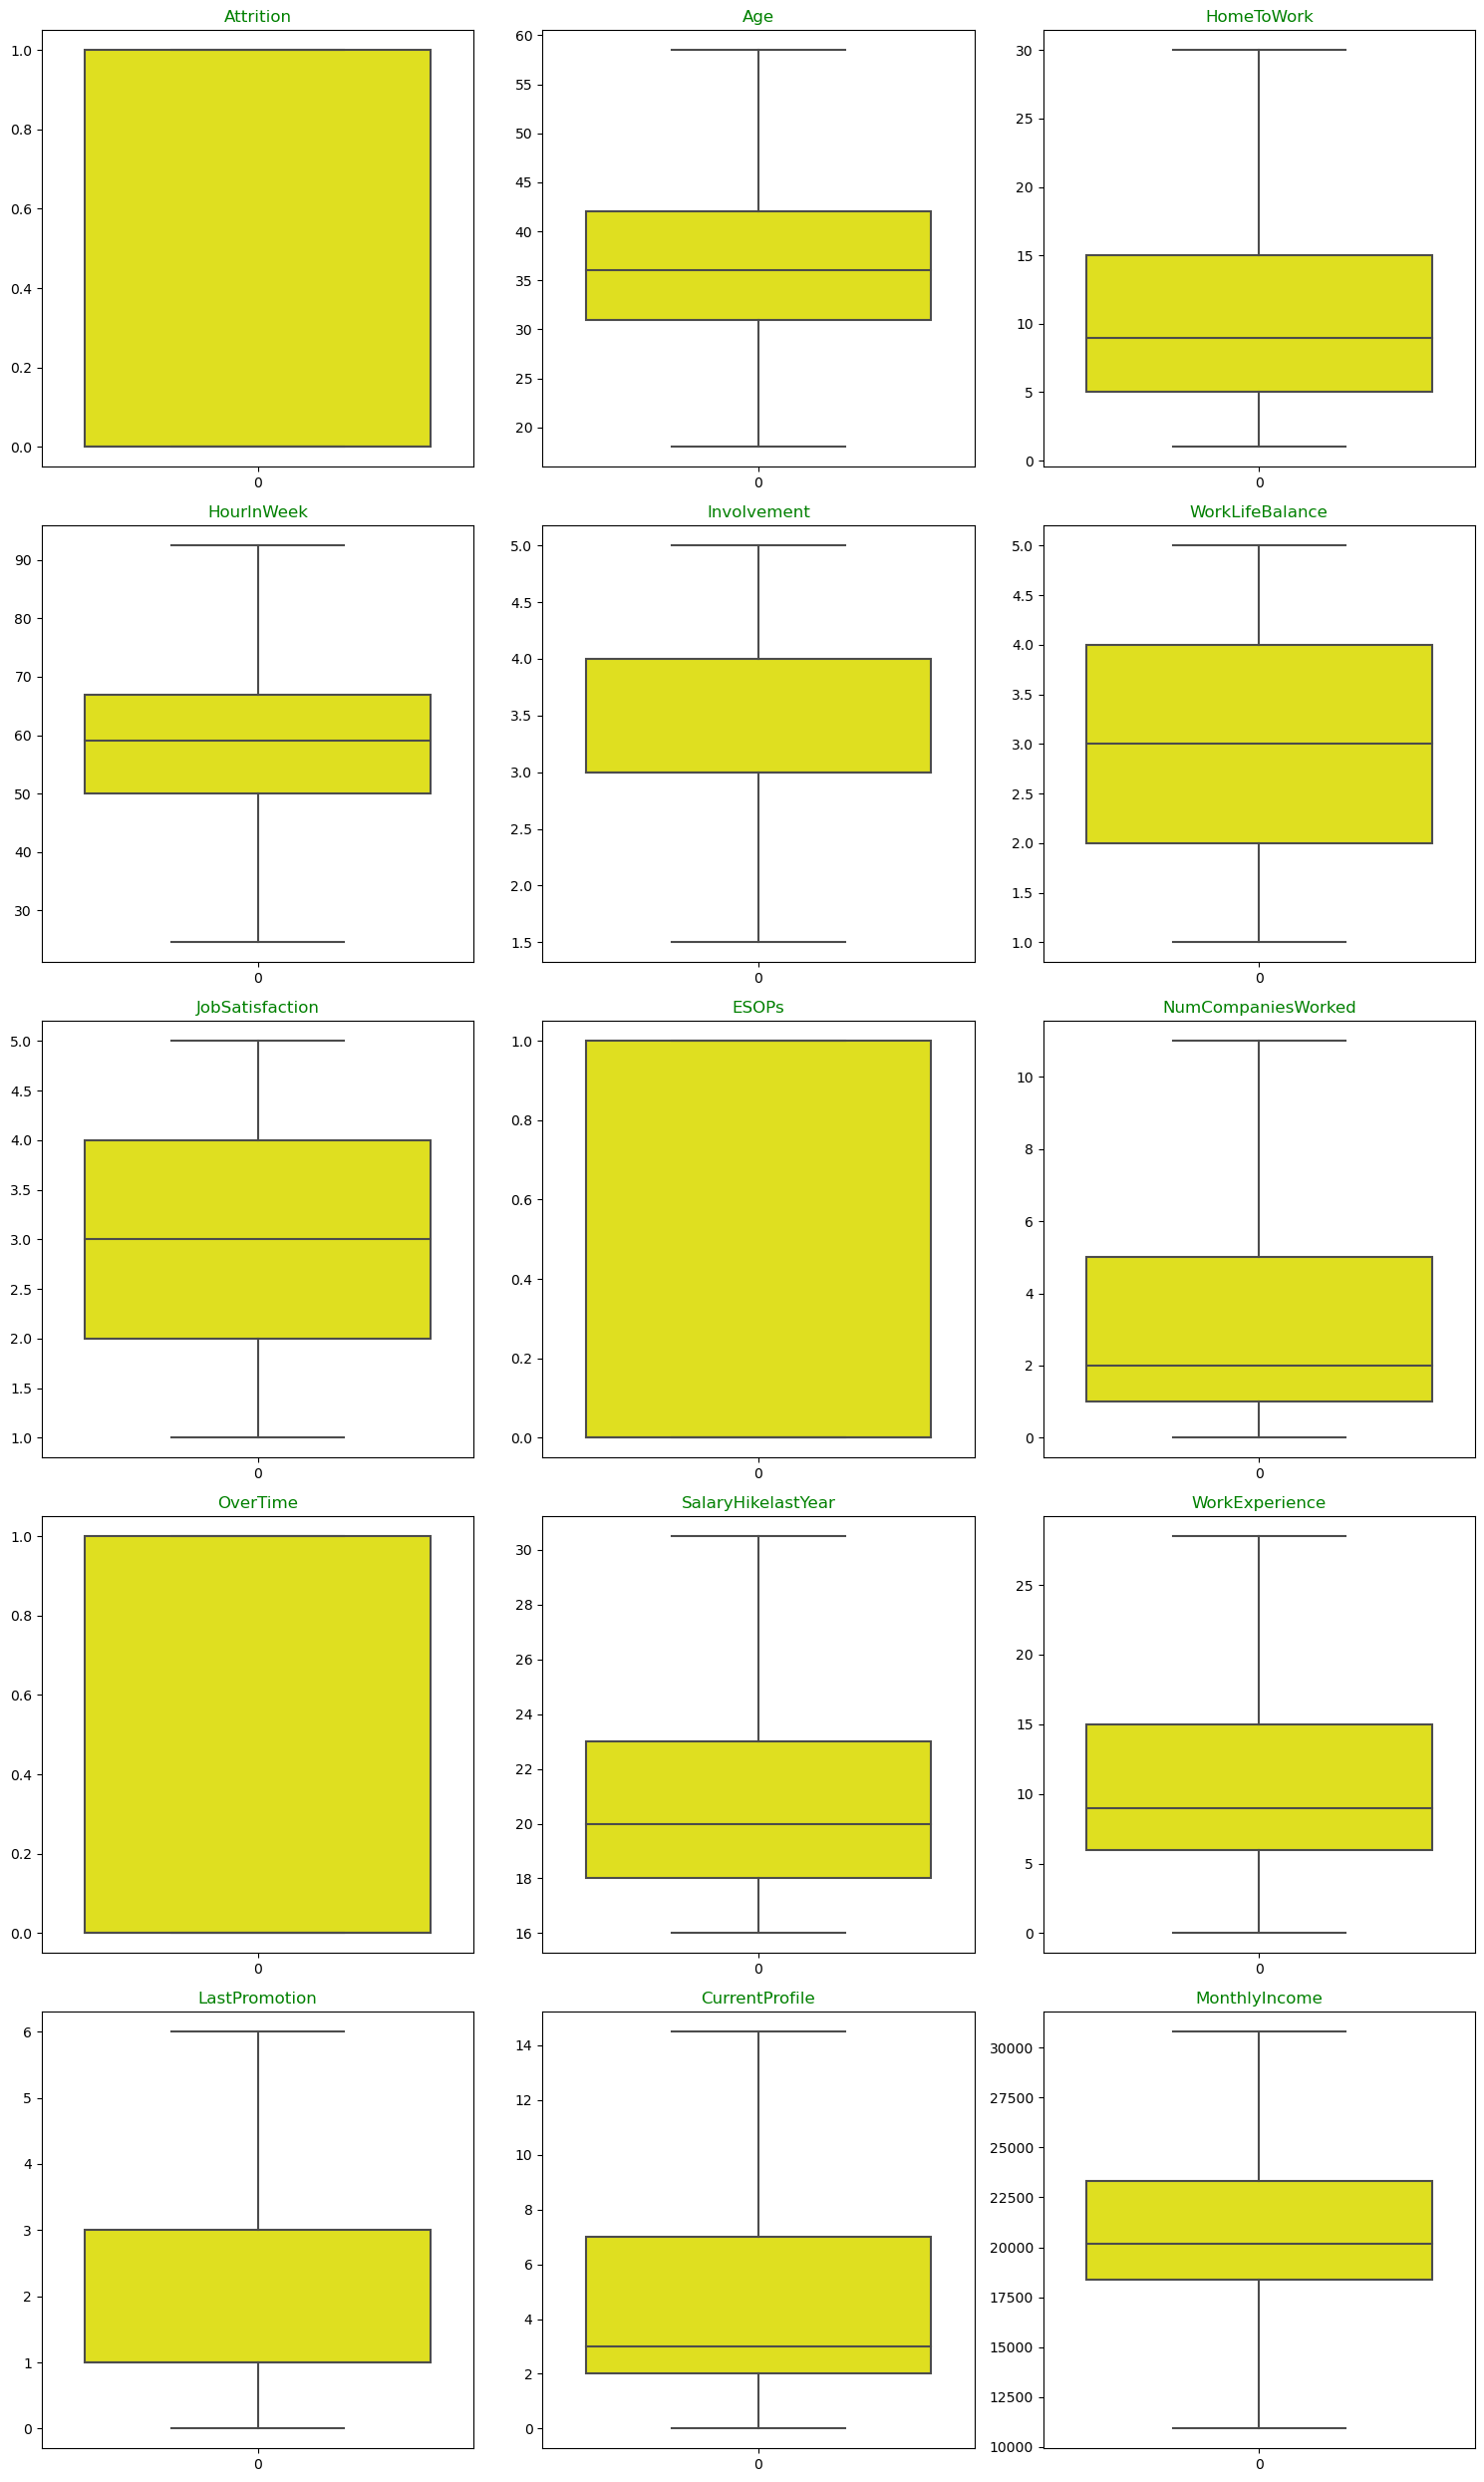

In [53]:
#Plotting Boxplots for Outlier visual

fig=plt.figure(figsize=(15,25))
for i in range(0,len(df_train.describe().columns)):
   ax=fig.add_subplot(5,3,i+1)
   sns.boxplot(df_train[df_train.describe().columns[i]],color='yellow')
   ax.set_title(df_train.describe().columns[i],color='green')
plt.tight_layout()
plt.show()

**Test Data**

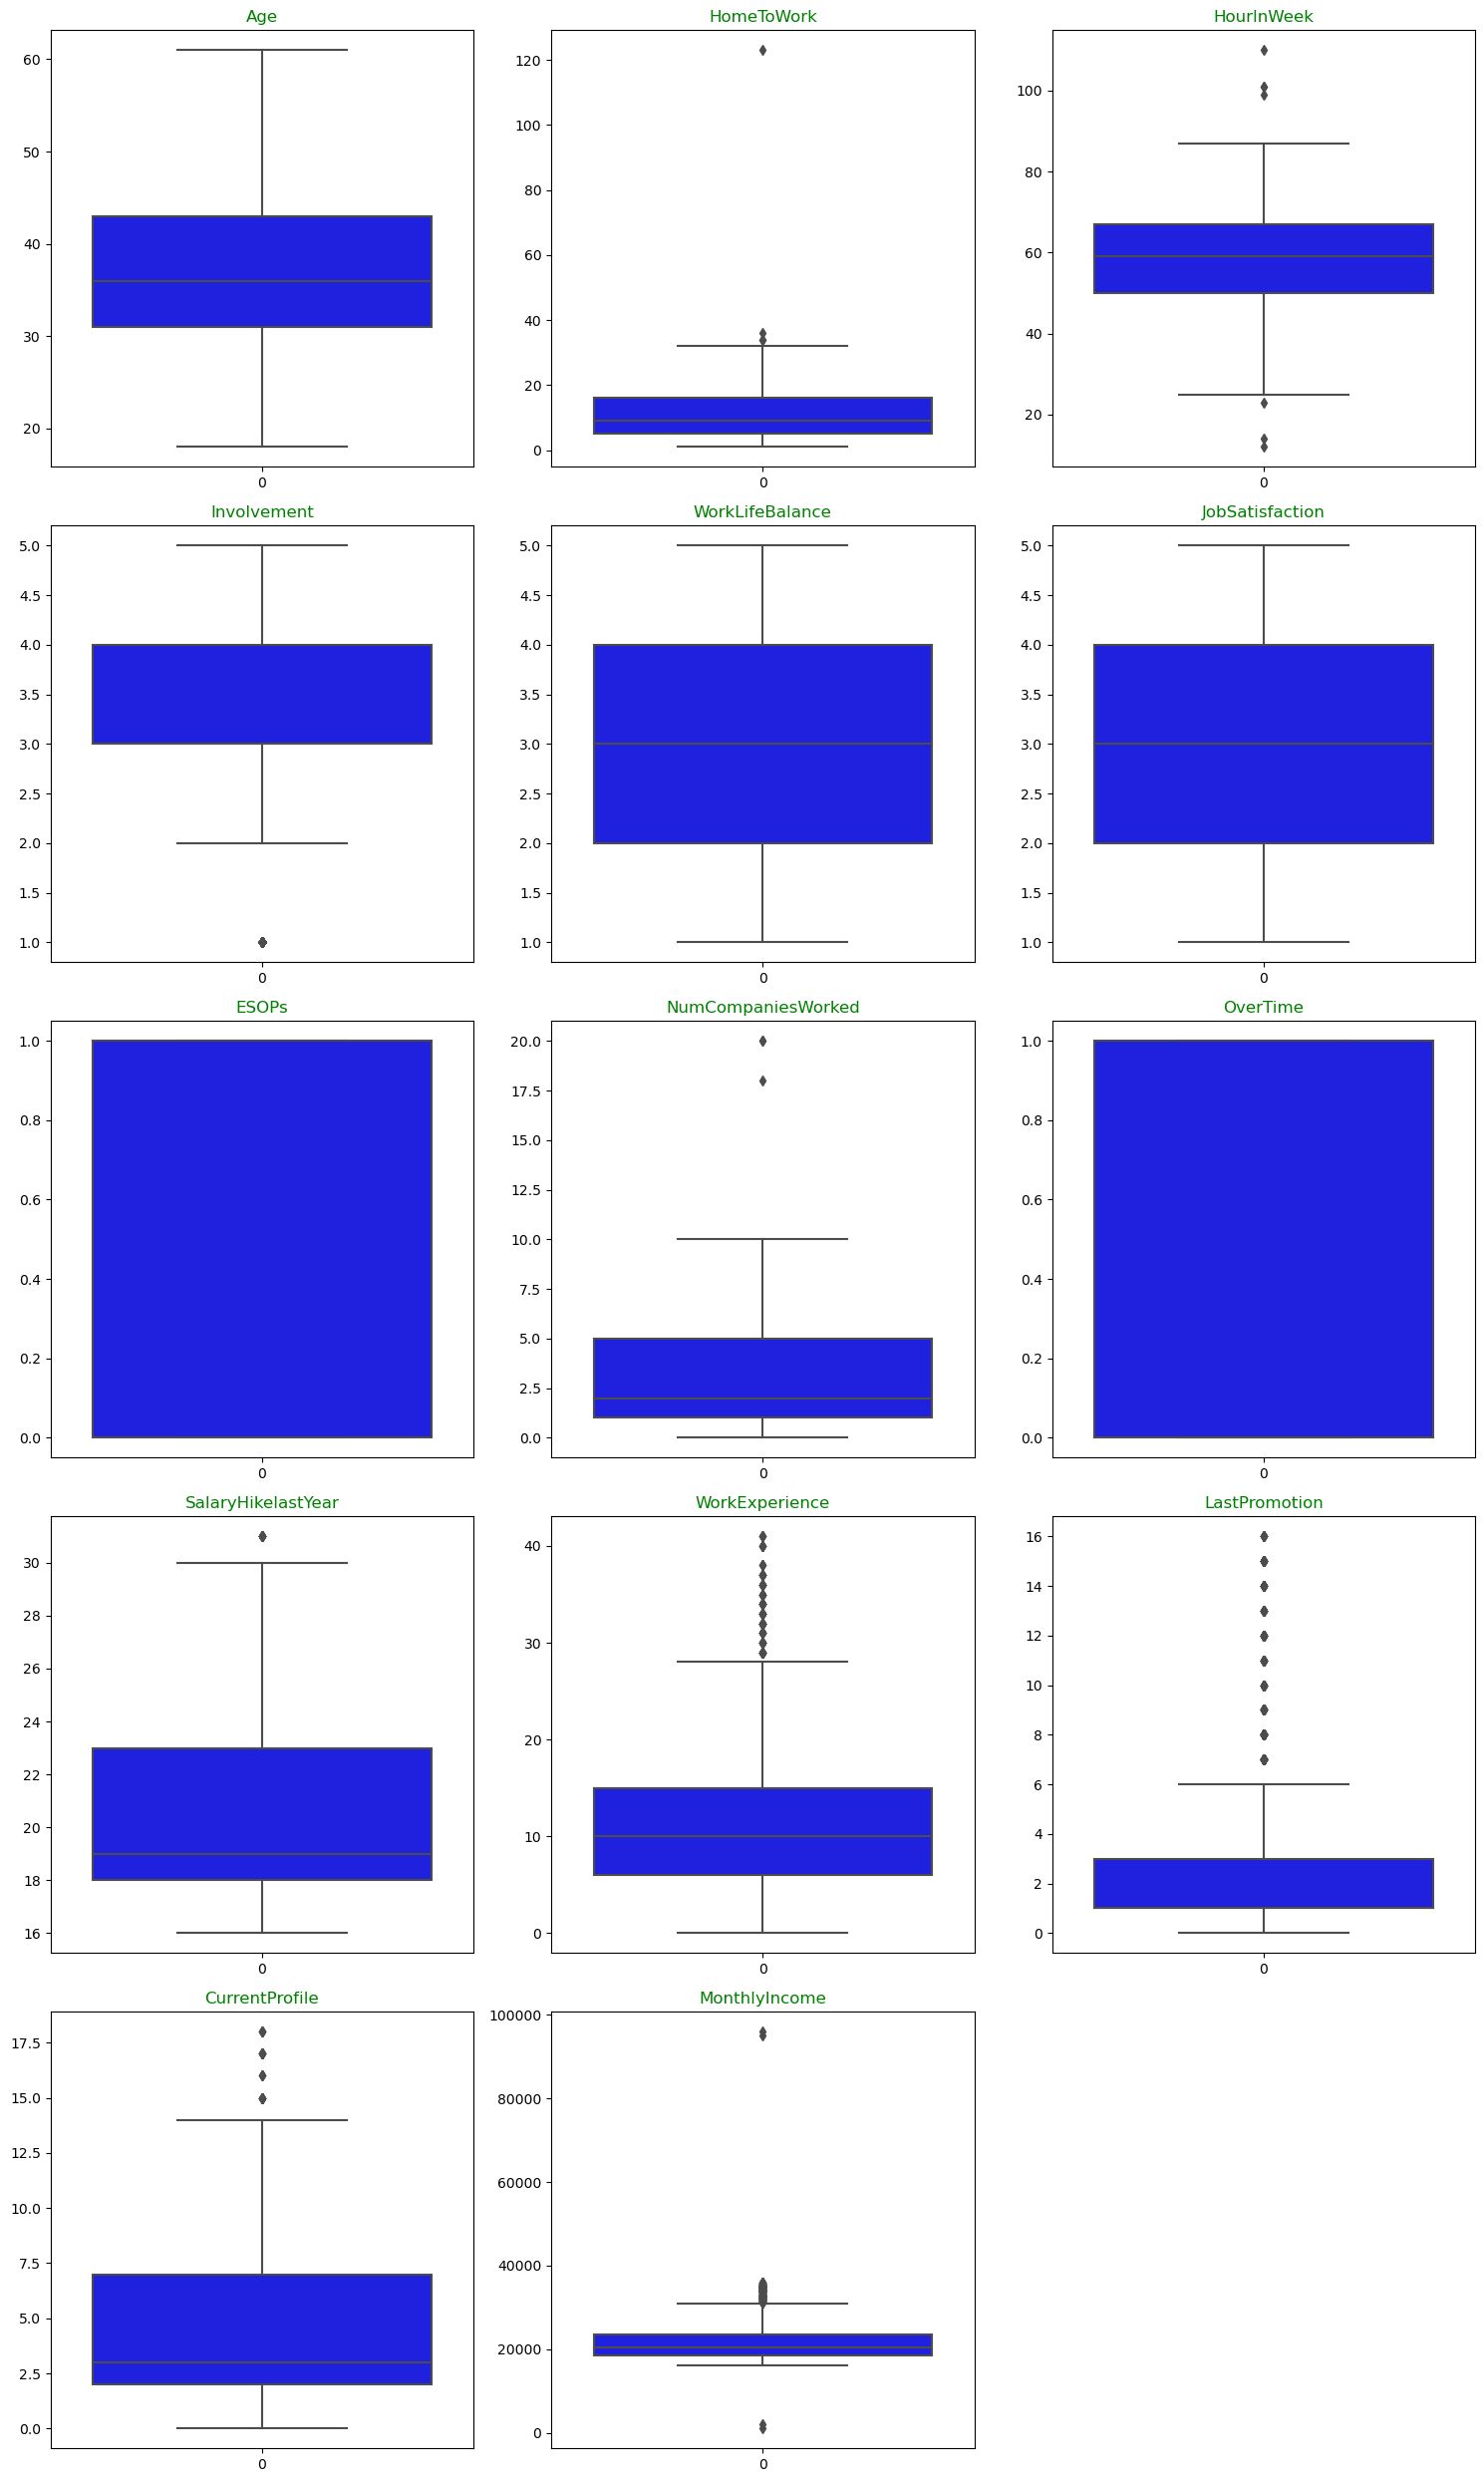

In [54]:
#Plotting Boxplots for Outlier visual

fig=plt.figure(figsize=(15,25))
for i in range(0,len(df_test.describe().columns)):
   ax=fig.add_subplot(5,3,i+1)
   sns.boxplot(df_test[df_test.describe().columns[i]],color='blue')
   ax.set_title(df_test.describe().columns[i],color='green')
plt.tight_layout()
plt.show()

In [55]:
# Cap & floor the values beyond the outlier boundaries
col = ['HomeToWork','HourlnWeek','Involvement','NumCompaniesWorked','SalaryHikelastYear',
        'WorkExperience','LastPromotion','CurrentProfile','MonthlyIncome']
#feature_list=ad_num.columns
for i in col:
    LL,UL = remove_outlier(df_test[i])
    df_test[i] = np.where(df_test[i] > UL,UL,df_test[i])
    df_test[i] = np.where(df_test[i] < LL,LL,df_test[i])

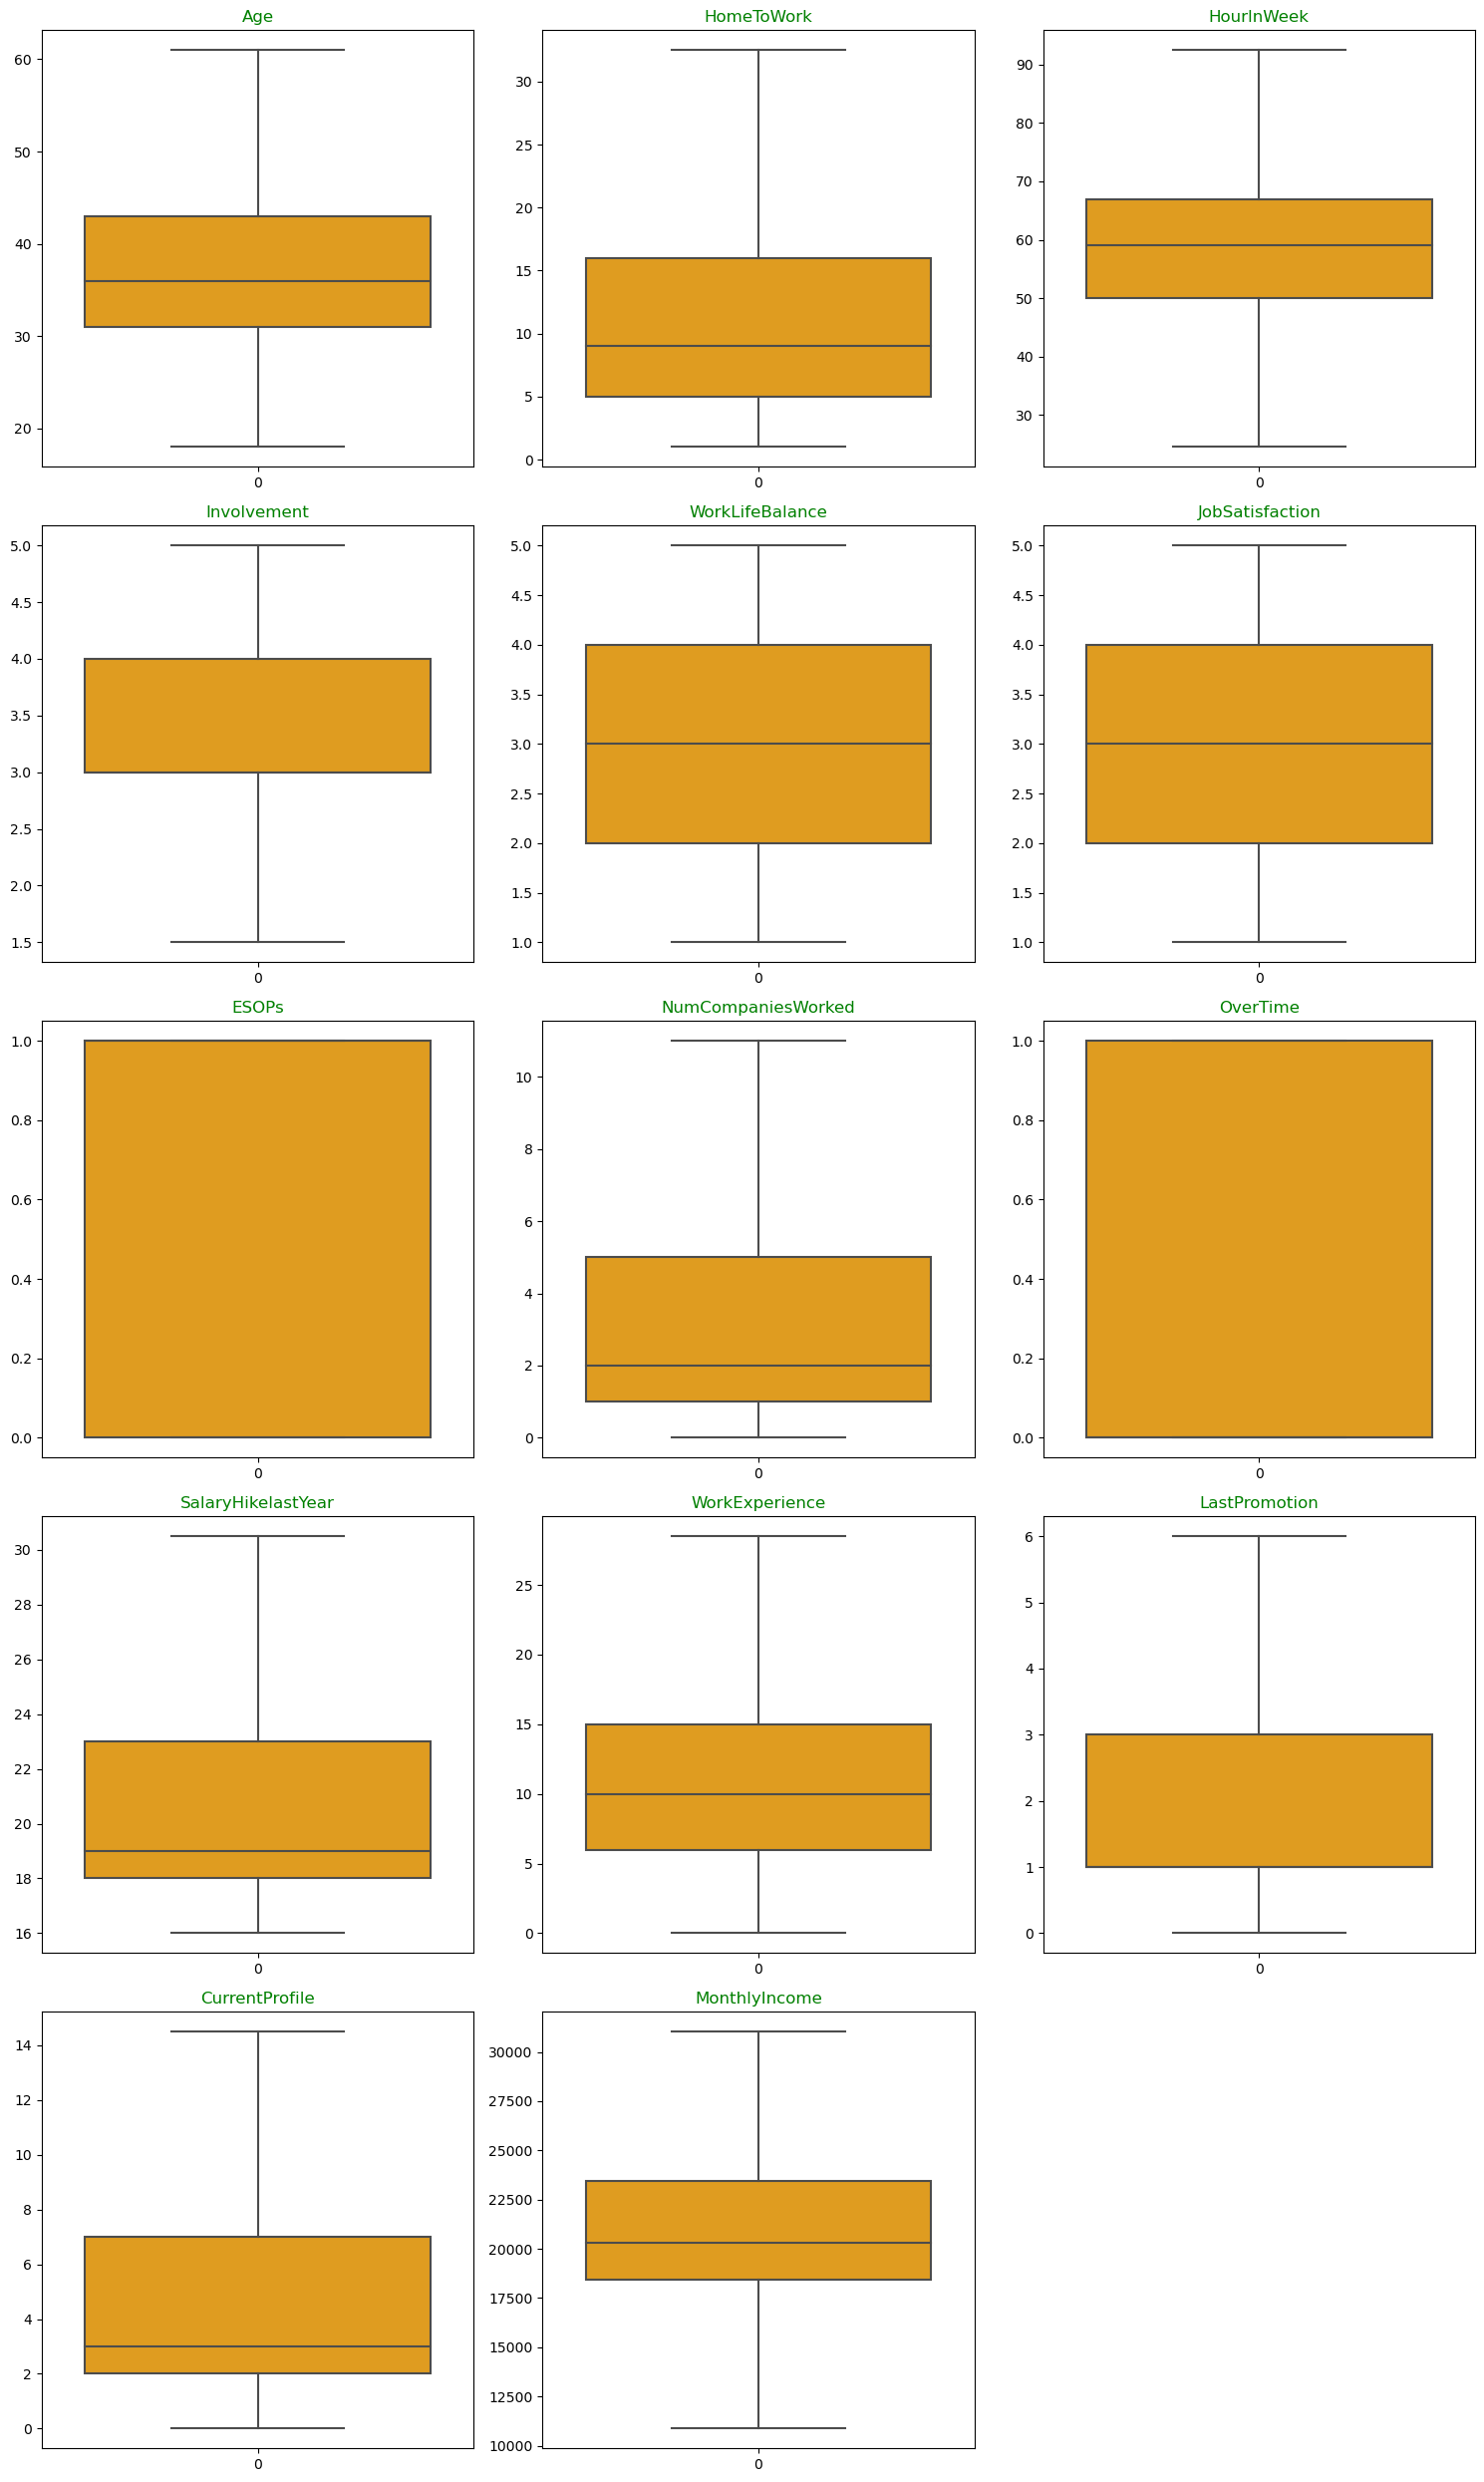

In [56]:
#Plotting Boxplots for Outlier visual

fig=plt.figure(figsize=(15,25))
for i in range(0,len(df_test.describe().columns)):
   ax=fig.add_subplot(5,3,i+1)
   sns.boxplot(df_test[df_test.describe().columns[i]],color='orange')
   ax.set_title(df_test.describe().columns[i],color='green')
plt.tight_layout()
plt.show()

**Encoding The data**

In [57]:
df_train.dtypes

Attrition             float64
Age                   float64
TravelProfile          object
Department             object
HomeToWork            float64
EducationField         object
Gender                 object
HourlnWeek            float64
Involvement           float64
WorkLifeBalance       float64
Designation            object
JobSatisfaction       float64
ESOPs                 float64
NumCompaniesWorked    float64
OverTime              float64
SalaryHikelastYear    float64
WorkExperience        float64
LastPromotion         float64
CurrentProfile        float64
MaritalStatus          object
MonthlyIncome         float64
dtype: object

In [58]:
obj_col = df_train[['TravelProfile','Department','EducationField', 'Gender','Designation','MaritalStatus']]
[df_train[i].value_counts() for i in obj_col]

[TravelProfile
 Rarely    3637
 Yes       1051
 No         492
 Name: count, dtype: int64,
 Department
 Analytics    3343
 Sales        1615
 Marketing     222
 Name: count, dtype: int64,
 EducationField
 Statistics           2129
 CA                   1560
 Marketing Diploma     603
 Engineer              487
 Other                 284
 MBA                   117
 Name: count, dtype: int64,
 Gender
 Male      3140
 Female    2040
 Name: count, dtype: int64,
 Designation
 Executive         2110
 Manager           1756
 Senior Manager     763
 AVP                328
 VP                 223
 Name: count, dtype: int64,
 MaritalStatus
 Married     2388
 Single      1776
 Divorsed    1016
 Name: count, dtype: int64]

In [59]:
obj_col = ['TravelProfile','Department','EducationField', 'Gender','Designation','MaritalStatus']

In [60]:
#Mapping over each element to convert it into numerical values
# Mapping implicitly convert the object datatype to interger datatype.   ## Note
# Train Data
df_train['Gender'] = df_train['Gender'].map({'Male':0,'Female':1})
df_train['MaritalStatus'] =df_train['MaritalStatus'].map({'Married':1,'Single':0,'Divorsed':2})
df_train['TravelProfile'] = df_train['TravelProfile'].map({'Rarely':1,'Yes':2,'No':0})
# Test data
df_test['Gender'] = df_test['Gender'].map({'Male':0,'Female':1})
df_test['MaritalStatus'] = df_test['MaritalStatus'].map({'Married':1,'Single':0,'Divorsed':2})
df_test['TravelProfile'] = df_test['TravelProfile'].map({'Rarely':1,'Yes':2,'No':0})

In [61]:
# Mapping implicitly convert the object datatype to interger datatype.   ## Note
df_train.dtypes

Attrition             float64
Age                   float64
TravelProfile           int64
Department             object
HomeToWork            float64
EducationField         object
Gender                  int64
HourlnWeek            float64
Involvement           float64
WorkLifeBalance       float64
Designation            object
JobSatisfaction       float64
ESOPs                 float64
NumCompaniesWorked    float64
OverTime              float64
SalaryHikelastYear    float64
WorkExperience        float64
LastPromotion         float64
CurrentProfile        float64
MaritalStatus           int64
MonthlyIncome         float64
dtype: object

In [62]:
df_test.dtypes

Age                   float64
TravelProfile           int64
Department             object
HomeToWork            float64
EducationField         object
Gender                  int64
HourlnWeek            float64
Involvement           float64
WorkLifeBalance         int64
Designation            object
JobSatisfaction         int64
ESOPs                   int64
NumCompaniesWorked    float64
OverTime                int64
SalaryHikelastYear    float64
WorkExperience        float64
LastPromotion         float64
CurrentProfile        float64
MaritalStatus           int64
MonthlyIncome         float64
dtype: object

In [63]:
df_train = pd.get_dummies(df_train,columns=['Department','EducationField','Designation'],drop_first=True)
df_test = pd.get_dummies(df_test,columns=['Department','EducationField','Designation'],drop_first=True)

In [64]:
df_train.head(2)

,Attrition,Age,TravelProfile,HomeToWork,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Department_Marketing,Department_Sales,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0.0,35.0,1,5.0,0,69.0,1.5,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,1,18932.0,False,False,False,False,False,False,False,True,False,False,False
1,1.0,32.0,2,5.0,1,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,0,18785.0,False,True,False,False,False,False,True,True,False,False,False


In [65]:
df_test.head(2)

,Age,TravelProfile,HomeToWork,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Department_Marketing,Department_Sales,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,18.0,0,9.0,0,80.0,3.0,2,3,1,1.0,0,17.0,0.0,0.0,0.0,0,16904.0,False,False,False,False,False,False,False,True,False,False,False
1,20.0,1,28.0,1,59.0,1.5,3,1,1,2.0,1,18.0,2.0,1.0,3.0,0,18994.0,False,False,False,False,False,False,True,True,False,False,False


In [66]:
df_train.dtypes


Attrition                           float64
Age                                 float64
TravelProfile                         int64
HomeToWork                          float64
Gender                                int64
HourlnWeek                          float64
Involvement                         float64
WorkLifeBalance                     float64
JobSatisfaction                     float64
ESOPs                               float64
NumCompaniesWorked                  float64
OverTime                            float64
SalaryHikelastYear                  float64
WorkExperience                      float64
LastPromotion                       float64
CurrentProfile                      float64
MaritalStatus                         int64
MonthlyIncome                       float64
Department_Marketing                   bool
Department_Sales                       bool
EducationField_Engineer                bool
EducationField_MBA                     bool
EducationField_Marketing Diploma

In [67]:
df_test.dtypes

Age                                 float64
TravelProfile                         int64
HomeToWork                          float64
Gender                                int64
HourlnWeek                          float64
Involvement                         float64
WorkLifeBalance                       int64
JobSatisfaction                       int64
ESOPs                                 int64
NumCompaniesWorked                  float64
OverTime                              int64
SalaryHikelastYear                  float64
WorkExperience                      float64
LastPromotion                       float64
CurrentProfile                      float64
MaritalStatus                         int64
MonthlyIncome                       float64
Department_Marketing                   bool
Department_Sales                       bool
EducationField_Engineer                bool
EducationField_MBA                     bool
EducationField_Marketing Diploma       bool
EducationField_Other            

**Making Copies of the dataset**

In [68]:
df_train_clean = df_train.copy()
df_test_clean = df_test.copy()

In [69]:
df_train.to_csv('df_train_clean.csv',index=False)

In [70]:
df = pd.read_csv("df_train_clean.csv")
df.head()

,Attrition,Age,TravelProfile,HomeToWork,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Department_Marketing,Department_Sales,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,0.0,35.0,1,5.0,0,69.0,1.5,1.0,1.0,1.0,1.0,1.0,20.0,7.0,2.0,3.0,1,18932.0,False,False,False,False,False,False,False,True,False,False,False
1,1.0,32.0,2,5.0,1,62.0,4.0,3.0,2.0,0.0,8.0,0.0,20.0,4.0,1.0,3.0,0,18785.0,False,True,False,False,False,False,True,True,False,False,False
2,0.0,31.0,1,5.0,1,45.0,5.0,3.0,2.0,1.0,3.0,0.0,26.0,12.0,1.0,3.0,0,22091.0,False,False,False,False,False,False,True,False,True,False,False
3,0.0,34.0,2,10.0,1,32.0,3.0,2.0,4.0,1.0,1.0,0.0,23.0,5.0,1.0,3.0,2,20302.0,False,True,False,False,False,False,True,False,True,False,False
4,0.0,37.0,0,27.0,1,49.0,3.0,4.0,4.0,1.0,8.0,0.0,21.0,12.0,1.0,9.0,2,21674.0,False,False,False,False,False,False,True,False,True,False,False


In [71]:
df_test.to_csv("df_test_clean.csv",index=False)

In [72]:
df.isnull().sum()

Attrition                           0
Age                                 0
TravelProfile                       0
HomeToWork                          0
Gender                              0
HourlnWeek                          0
Involvement                         0
WorkLifeBalance                     0
JobSatisfaction                     0
ESOPs                               0
NumCompaniesWorked                  0
OverTime                            0
SalaryHikelastYear                  0
WorkExperience                      0
LastPromotion                       0
CurrentProfile                      0
MaritalStatus                       0
MonthlyIncome                       0
Department_Marketing                0
Department_Sales                    0
EducationField_Engineer             0
EducationField_MBA                  0
EducationField_Marketing Diploma    0
EducationField_Other                0
EducationField_Statistics           0
Designation_Executive               0
Designation_

**Model Building : Without scaling the data**

In [73]:
X_train = df.drop('Attrition',axis=1)
y_train = df['Attrition']

In [74]:
df_cleanTest = pd.read_csv("df_test_clean.csv")
df_cleanTest.head(2)

,Age,TravelProfile,HomeToWork,Gender,HourlnWeek,Involvement,WorkLifeBalance,JobSatisfaction,ESOPs,NumCompaniesWorked,OverTime,SalaryHikelastYear,WorkExperience,LastPromotion,CurrentProfile,MaritalStatus,MonthlyIncome,Department_Marketing,Department_Sales,EducationField_Engineer,EducationField_MBA,EducationField_Marketing Diploma,EducationField_Other,EducationField_Statistics,Designation_Executive,Designation_Manager,Designation_Senior Manager,Designation_VP
0,18.0,0,9.0,0,80.0,3.0,2,3,1,1.0,0,17.0,0.0,0.0,0.0,0,16904.0,False,False,False,False,False,False,False,True,False,False,False
1,20.0,1,28.0,1,59.0,1.5,3,1,1,2.0,1,18.0,2.0,1.0,3.0,0,18994.0,False,False,False,False,False,False,True,True,False,False,False


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier

**Logistic Regression**

In [43]:
lgt = LogisticRegression()
lgt.fit(X_train,y_train)

C:\Users\Shobha\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

https://scikit-learn.org/stable/modules/preprocessing.html
https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

In [44]:
lgt.score(X_train,y_train)

0.7521235521235521

In [11]:
y_pred = lgt.predict(df_cleanTest)

In [22]:
df_test1 = pd.read_csv("Test_Dataset_(1).csv")

In [19]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)

In [20]:
df2.head()

,EmployeeID,Attrition
0,6110001,1.0
1,6110002,1.0
2,6110003,0.0
3,6110004,1.0
4,6110005,0.0


In [22]:
df2.to_csv("Submission_1.csv",index=False)

In [38]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [39]:
pipe.score(X_train,y_train)

0.8106177606177606

In [23]:
lgt = LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=-1)
lgt.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.0s finished


LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None, solver='newton-cg',
                   verbose=True)

In [24]:
lgt.score(X_train,y_train)

0.8106177606177606

In [25]:
y_pred = lgt.predict(df_cleanTest)

In [26]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)

In [27]:
df2.to_csv("Submission_1.csv",index=False)

In [41]:
pipe = make_pipeline(StandardScaler(), LogisticRegression(solver='newton-cg',max_iter=10000,penalty=None,verbose=True,n_jobs=-1))
pipe.fit(X_train, y_train)  # apply scaling on training data

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   11.8s finished


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(max_iter=10000, n_jobs=-1, penalty=None,
                                    solver='newton-cg', verbose=True))])

In [42]:
pipe.score(X_train,y_train)

0.8106177606177606

**LDA**

In [28]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [30]:
lda.score(X_train,y_train)

0.8162162162162162

In [31]:
y_pred = lda.predict(df_cleanTest)

In [32]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)

In [33]:
df2.to_csv("Submission_1.csv",index=False)

In [34]:
from sklearn.pipeline import make_pipeline

In [45]:
pipe = make_pipeline(StandardScaler(), LinearDiscriminantAnalysis())

In [46]:
pipe.fit(X_train, y_train)  # apply scaling on training data

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('lineardiscriminantanalysis', LinearDiscriminantAnalysis())])

In [47]:
pipe.score(X_train,y_train)

0.8162162162162162

In [48]:
# pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

In [49]:
y_pred = pipe.predict(df_cleanTest)

In [50]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)

In [51]:
df2.to_csv("Submission_1.csv",index=False)

In [55]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline 

In [64]:
pipe = Pipeline([("scl",StandardScaler()),("pca",PCA(n_components=2)),("lgt",LogisticRegression())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('lgt', LogisticRegression())])

In [65]:
pipe.score(X_train,y_train)

0.7305019305019305

In [66]:
y_pred = pipe.predict(df_cleanTest)

In [67]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)
df2.to_csv("Submission_1.csv",index=False)

In [69]:
pipe = Pipeline([("scl",StandardScaler()),("pca",PCA(n_components=2)),("lda",LinearDiscriminantAnalysis())])
pipe.fit(X_train,y_train)

Pipeline(steps=[('scl', StandardScaler()), ('pca', PCA(n_components=2)),
                ('lda', LinearDiscriminantAnalysis())])

In [70]:
pipe.score(X_train,y_train)

0.7254826254826254

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
pipe = Pipeline([("sc",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=3))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [73]:
pipe.score(X_train,y_train)

0.9936293436293436

In [74]:
y_pred = pipe.predict(df_cleanTest)

In [76]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)
# df2.to_csv("Submission_1.csv",index=False)

In [77]:
df2.to_csv("Submission_1.csv",index=False)    # test accu: 0.9711027

In [78]:
pipe = Pipeline([("sc",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=5))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()), ('knn', KNeighborsClassifier())])

In [79]:
pipe.score(X_train,y_train)

0.9870656370656371

In [81]:
y_pred = pipe.predict(df_cleanTest)

In [82]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)

In [83]:
df2.to_csv("Submission_1.csv",index=False)    # Test acc: 0.9547529

In [ ]:
knn = KNeighborsClassifier()

In [85]:
pipe = Pipeline([("sc",StandardScaler()),("knn",KNeighborsClassifier(n_neighbors=3,weights='distance'))])
pipe.fit(X_train,y_train)

Pipeline(steps=[('sc', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(n_neighbors=3, weights='distance'))])

In [86]:
pipe.score(X_train,y_train)

1.0

In [87]:
y_pred = pipe.predict(df_cleanTest)

In [88]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)

In [89]:
df2.to_csv("Submission_1.csv",index=False)    # Test acc: 0.9756654

In [95]:
rf = RandomForestClassifier(n_estimators=300, max_depth= 25, max_features= 15, random_state = 100,n_jobs=-1)
ADB_model=AdaBoostClassifier(n_estimators=3000,random_state=1,base_estimator=rf,learning_rate=0.5)
ADB_model.fit(X_train,y_train)

C:\Users\Shobha\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=25,
                                                         max_features=15,
                                                         n_estimators=300,
                                                         n_jobs=-1,
                                                         random_state=100),
                   learning_rate=0.5, n_estimators=3000, random_state=1)

In [97]:
ADB_model.score(X_train,y_train)

1.0

In [98]:
y_pred = ADB_model.predict(df_cleanTest)

In [99]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)

In [100]:
df2.to_csv("Submission_1.csv",index=False)    # Test acc: 0.9920152

In [15]:
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold
import xgboost
from xgboost import XGBClassifier
# from xgboost.xgbclassifier import XGBClassifier 

In [16]:
# pip install xgboost

In [18]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

# y_pred = xgb.predict(df_test._get_numeric_data())

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [19]:
xgb.score(X_train,y_train)

1.0

In [20]:
y_pred = xgb.predict(df_cleanTest)

In [23]:
data = {'EmployeeID': list(df_test1['EmployeeID']),'Attrition': list(y_pred)}
df2 = pd.DataFrame(data)

In [24]:
df2.to_csv("Submission_1.csv",index=False)    # Test acc: 0.9920152